In [1]:
import time 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Threshold 
MIN_MATCH_COUNT=30

# Initiate SIFT detector
sift=cv2.SIFT_create()

In [3]:
# Create the Flann Matcher object
FLANN_INDEX_KDITREE=0
flannParam=dict(algorithm=FLANN_INDEX_KDITREE,tree=5)
flann=cv2.FlannBasedMatcher(flannParam,{})

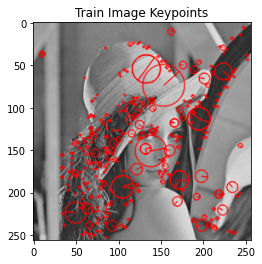

In [5]:
train_img= cv2.imread("./res/lenatrain.jpg",0)  # train image
kp1,desc1= sift.detectAndCompute(train_img,None) # find the keypoints and descriptors with SIFT
train_img_kp= cv2.drawKeypoints(train_img,kp1,None,(255,0,0),4) # draw keypoints of the train image
plt.imshow(train_img_kp)    # show the train image keypoints
plt.title('Train Image Keypoints')
plt.show()

In [ ]:
# start capturing video
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)   # turn the frame captured into grayscale
    kp2, desc2 = sift.detectAndCompute(gray,None)   # find the keypoints and descriptors with SIFT  of the frame captured
    
    # Obtain matches using K-Nearest Neighbor Method
    # the result 'matches' is the number of similar matches found in both images
    matches=flann.knnMatch(desc2,desc1,k=2)


    # store all the good matches as per Lowe's ratio test.
    goodMatch=[]
    for m,n in matches:
        if(m.distance<0.75*n.distance):
            goodMatch.append(m)


    # If enough matches are found, we extract the locations of matched keypoints 
    # in both the images.
    # They are passed to find the perpective transformation.
    # Once we get this 3x3 transformation matrix, we use it to transform the corners 
    # of query image to corresponding points in train image. Then we draw it.

    if(len(goodMatch)>MIN_MATCH_COUNT):
        tp=[]  # src_pts
        qp=[]  # dst_pts
        for m in goodMatch:
            tp.append(kp1[m.trainIdx].pt)
            qp.append(kp2[m.queryIdx].pt)
        tp,qp=np.float32((tp,qp))

        H,status=cv2.findHomography(tp,qp,cv2.RANSAC,3.0)


        h,w = train_img.shape
        train_outline= np.float32([[[0,0],[0,h-1],[w-1,h-1],[w-1,0]]])
        query_outline = cv2.perspectiveTransform(train_outline,H)

        cv2.polylines(frame,[np.int32(query_outline)],True,(0,255,0),5)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
        print("Match Found-")
        print(len(goodMatch),MIN_MATCH_COUNT)

    else:
        print("Not Enough match found-")
        print(len(goodMatch),MIN_MATCH_COUNT)
    cv2.imshow('result',frame)

    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()

Not Enough match found-
6 30
Not Enough match found-
9 30
Not Enough match found-
8 30
Not Enough match found-
5 30
Not Enough match found-
6 30
Not Enough match found-
11 30
Not Enough match found-
5 30
Not Enough match found-
9 30
Not Enough match found-
10 30
Not Enough match found-
4 30
Not Enough match found-
8 30
Not Enough match found-
8 30
Not Enough match found-
8 30
Not Enough match found-
11 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
9 30
Not Enough match found-
8 30
Not Enough match found-
7 30
Not Enough match found-
9 30
Not Enough match found-
6 30
Not Enough match found-
7 30
Not Enough match found-
3 30
Not Enough match found-
5 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough match found-
7 30
Not Enough match found-
5 30
Not Enough match found-
3 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough match found-
8 30
Not Enough match found-
5 30
Not Enough match found-
6 30
Not Enough 

Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
4 30
Not Enough match found-
2 30
Not Enough match found-
2 30
Not Enough match found-
3 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough match found-
3 30
Not Enough match found-
5 30
Not Enough match found-
1 30
Not Enough match found-
3 30
Not Enough match found-
2 30
Not Enough match found-
5 30
Not Enough match found-
3 30
Not Enough match found-
2 30
Not Enough match found-
6 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough match found-
5 30
Not Enough match found-
5 30
Not Enough match found-
3 30
Not Enough match found-
8 30
Not Enough match found-
5 30
Not Enough match found-
4 30
Not Enough match found-
6 30
Not Enough match found-
10 30
Not Enough match found-
3 30
Not Enough match found-
5 30
Not Enough match found-
1 30
Not Enough match found-
2 30
Not Enough match found-
6 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough ma

Not Enough match found-
8 30
Not Enough match found-
4 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
7 30
Not Enough match found-
11 30
Not Enough match found-
15 30
Not Enough match found-
12 30
Not Enough match found-
7 30
Not Enough match found-
8 30
Not Enough match found-
9 30
Not Enough match found-
10 30
Not Enough match found-
7 30
Not Enough match found-
8 30
Not Enough match found-
10 30
Not Enough match found-
6 30
Not Enough match found-
8 30
Not Enough match found-
5 30
Not Enough match found-
11 30
Not Enough match found-
6 30
Not Enough match found-
6 30
Not Enough match found-
5 30
Not Enough match found-
10 30
Not Enough match found-
3 30
Not Enough match found-
3 30
Not Enough match found-
5 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
13 30
Not Enough match found-
4 30
Not Enough match found-
11 30
Not Enough match found-
16 30
Not Enough match found-
10 30
Not Enough match found-
4 30
Not

Not Enough match found-
4 30
Not Enough match found-
10 30
Not Enough match found-
7 30
Not Enough match found-
9 30
Not Enough match found-
10 30
Not Enough match found-
6 30
Not Enough match found-
4 30
Not Enough match found-
4 30
Not Enough match found-
6 30
Not Enough match found-
5 30
Not Enough match found-
7 30
Not Enough match found-
7 30
Not Enough match found-
5 30
Not Enough match found-
9 30
Not Enough match found-
9 30
Not Enough match found-
9 30
Not Enough match found-
5 30
Not Enough match found-
5 30
Not Enough match found-
8 30
Not Enough match found-
6 30
Not Enough match found-
10 30
Not Enough match found-
6 30
Not Enough match found-
12 30
Not Enough match found-
8 30
Not Enough match found-
6 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
5 30
Not Enough match found-
7 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
10 30
Not Enough match found-
14 30
Not Enough match found-
10 30
Not Eno

Match Found-
36 30
Match Found-
40 30
Match Found-
47 30
Match Found-
46 30
Match Found-
48 30
Match Found-
40 30
Not Enough match found-
29 30
Match Found-
34 30
Match Found-
34 30
Match Found-
32 30
Match Found-
46 30
Not Enough match found-
27 30
Match Found-
34 30
Not Enough match found-
14 30
Not Enough match found-
18 30
Not Enough match found-
22 30
Not Enough match found-
11 30
Not Enough match found-
10 30
Not Enough match found-
12 30
Not Enough match found-
9 30
Not Enough match found-
12 30
Not Enough match found-
17 30
Not Enough match found-
18 30
Not Enough match found-
13 30
Not Enough match found-
20 30
Not Enough match found-
14 30
Not Enough match found-
17 30
Not Enough match found-
20 30
Not Enough match found-
22 30
Not Enough match found-
11 30
Not Enough match found-
21 30
Not Enough match found-
21 30
Not Enough match found-
14 30
Not Enough match found-
7 30
Not Enough match found-
13 30
Not Enough match found-
9 30
Not Enough match found-
8 30
Not Enough matc

Not Enough match found-
4 30
Not Enough match found-
5 30
Not Enough match found-
6 30
Not Enough match found-
7 30
Not Enough match found-
4 30
Not Enough match found-
2 30
Not Enough match found-
6 30
Not Enough match found-
6 30
Not Enough match found-
9 30
Not Enough match found-
7 30
Not Enough match found-
5 30
Not Enough match found-
3 30
Not Enough match found-
8 30
Not Enough match found-
10 30
Not Enough match found-
6 30
Not Enough match found-
12 30
Not Enough match found-
13 30
Not Enough match found-
5 30
Not Enough match found-
2 30
Not Enough match found-
9 30
Not Enough match found-
6 30
Not Enough match found-
14 30
Not Enough match found-
13 30
Not Enough match found-
10 30
Not Enough match found-
10 30
Not Enough match found-
8 30
Not Enough match found-
4 30
Not Enough match found-
1 30
Not Enough match found-
2 30
Not Enough match found-
6 30
Not Enough match found-
2 30
Not Enough match found-
2 30
Not Enough match found-
0 30
Not Enough match found-
1 30
Not Eno

Not Enough match found-
0 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
3 30
Not Enough match found-
1 30
Not Enough match found-
2 30
Not Enough match found-
3 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
0 30
Not Enough match found-
1 30
Not Enough match found-
2 30
Not Enough match found-
4 30
Not Enough match found-
1 30
Not Enough match found-
0 30
Not Enough match found-
1 30
Not Enough match found-
0 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
3 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
1 30
Not Enough match found-
0 30
Not Enough match found-
2 30
Not Enough match found-
2 30
Not Enough match found-
0 30
Not Enough match found-
1 30
Not Enough match found-
0 30
Not Enough mat

Not Enough match found-
8 30
Not Enough match found-
7 30
Not Enough match found-
5 30
Not Enough match found-
5 30
Not Enough match found-
4 30
Not Enough match found-
11 30
Not Enough match found-
5 30
Not Enough match found-
12 30
Not Enough match found-
8 30
Not Enough match found-
5 30
Not Enough match found-
7 30
Not Enough match found-
6 30
Not Enough match found-
4 30
Not Enough match found-
4 30
Not Enough match found-
2 30
Not Enough match found-
3 30
Not Enough match found-
1 30
Not Enough match found-
2 30
Not Enough match found-
4 30
Not Enough match found-
4 30
Not Enough match found-
2 30
Not Enough match found-
1 30
Not Enough match found-
5 30
Not Enough match found-
4 30
Not Enough match found-
2 30
Not Enough match found-
3 30
Not Enough match found-
4 30
Not Enough match found-
3 30
Not Enough match found-
2 30
Not Enough match found-
5 30
Not Enough match found-
8 30
Not Enough match found-
4 30
Not Enough match found-
7 30
Not Enough match found-
4 30
Not Enough m

Not Enough match found-
12 30
Not Enough match found-
11 30
Not Enough match found-
7 30
Not Enough match found-
11 30
Not Enough match found-
10 30
Not Enough match found-
13 30
Not Enough match found-
16 30
Not Enough match found-
6 30
Not Enough match found-
4 30
Not Enough match found-
9 30
Not Enough match found-
16 30
Not Enough match found-
2 30
Not Enough match found-
14 30
Not Enough match found-
8 30
Not Enough match found-
7 30
Not Enough match found-
11 30
Not Enough match found-
6 30
Not Enough match found-
8 30
Not Enough match found-
11 30
Not Enough match found-
8 30
Not Enough match found-
11 30
Not Enough match found-
10 30
Not Enough match found-
6 30
Not Enough match found-
9 30
Not Enough match found-
11 30
Not Enough match found-
4 30
Not Enough match found-
10 30
Not Enough match found-
8 30
Not Enough match found-
6 30
Not Enough match found-
15 30
Not Enough match found-
9 30
Not Enough match found-
8 30
Not Enough match found-
8 30
Not Enough match found-
7 30